## 分类模型的评价指标
- 问题：如何评判两部手机的好坏？
    - 1.根据性能评价
    - 2.根据外观评价
    - 3.根据价格评价
- 分析：如果对一个事物进行好坏的评价，首先我们一定是在指定场景下，使用符合该场景相关的评价标准对其进行好坏的评价！那么归于分类模型的评价有如下几种方式：
    - 准确率
    - 精准率
    - 召回率
    - f1-Score
    - auc曲线
- 在介绍每种评价指标之前，首先我们来看一个叫做混淆矩阵的东西：
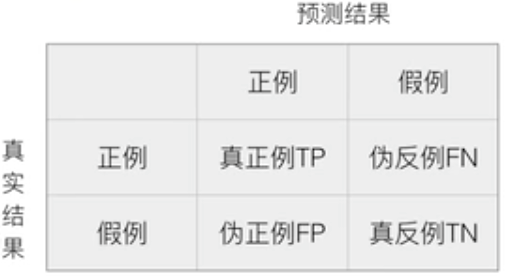
    

### 混淆矩阵
- 概念：在分类任务下，预测结果（Predict Condition）和真实结果（True Condition）之间存在的四种不同的组合。适用于二分类和多分类
- 例子：设计一个二分类的场景，将图片分类为猫或者狗。则：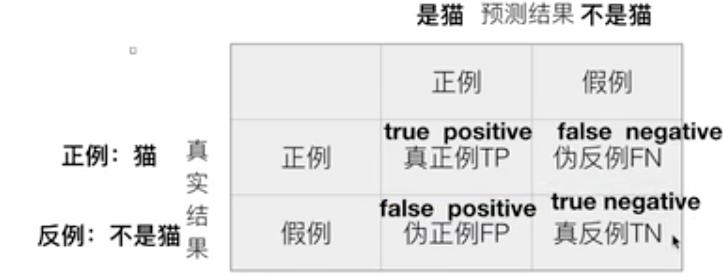
    
    - 真正例（TP）：本来是猫结果预测值为猫的比例（预测为正例是真的）
    - 伪正例（FP）：本来不是猫结果预测值为猫的比例（预测为正例是假的）
    - 伪反例（FN）：本来是猫结果预测值为不是猫的比例（预测为反例是假的）
    - 真反例（TN）：本来不是猫结果预测值为不是猫的比例（预测为反例是真的）
        - 真正例率TPR = TP / (TP + FN)
            - 预测为正例且实际为正例的样本占所有训练集中为正例样本的比例。
            - 将正例预测对的占正样本的比例（预测对的比例），这个比例越大越好
        - 伪反例率FPR = FP / (FP + TN)
            - 预测为正例但实际为负例的样本占训练集中所有负例样本的比例
            - 将负例预测错的占负样本的比例（预测错的比例），这个比例越小越好
    <h3>- 注意：如果有其他的类别，其他的每一个类别也有其对应的混淆矩阵表示真伪正例和真伪反例的比例</h3>

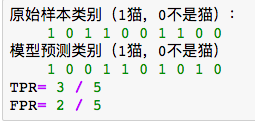

### 准确率
- Accuracy = (TP+TN)/(TP+FN+FP+TN)
    - 解释：(预测正确)/(预测对的和不对的所有结果)，简而言之就是预测正确的比例。
        - 准确率=所有预测正确的结果除以所有结果
        - 比如一个模型要识别 5 张图片，最后 识别正确 4 张图片，错了 1 张，那么准确率就是 4/5=80%
    - 模型.score()方法返回的就是模型的准确率
    - 案例欣赏：
        - 倘若某人声称创建了一个能够识别登上飞机的恐怖分子的模型，并且准确率(accuracy)高达 99%。这能算是个好模型吗?已知美国全年平均有 8 亿人次的乘客，并且在 2000- 2017 年间共发现了 19 名恐怖分子。如果有一个模型将从美国机场起飞的所有乘客都标注为 非恐怖分子，那么这个模型达到了接近完美的准确率——99.99999%。这听起来确实令人印 象深刻，但是美国国土安全局肯定不会购买这个模型。尽管这个模型拥有接近完美的准确率， 但是在这个问题中准确率显然不是一个合适的度量指标。
        - 恐怖分子检测是一个不平衡的分类问题:我们需要鉴别的类别有两个，恐怖分子和非恐怖 分子，其中一个类别代表了极大多数的数据，而另一个类别数据却很少。比如我们把恐怖分子 定义为正例，非恐怖分子定义为负例，那么正例类别——恐怖分子，远远少于负例类别——非 恐怖分子的数量。这种数据不均衡的问题是数据科学中比较常见的，在数据不均衡的情况下使 用准确率并不是评估模型性能的很好的衡量标准。当然，如果是数据比较均衡的情况下，我们 还是可以使用准确率来作为分类模型的评估指标。

### 召回率（较多被使用）
- 在数据不均衡的场景下，我们应该考虑的评估指标应该是精确率和召回率。

- Recal = TP/(TP+FN)
    - 解释：
        - 真正为正例的样本中预测结果为正例的比例。正样本有多少被找出来了（召回了多少）
        - 召回率描述的是模型对于正例——恐怖分子的召回能力（精准找到正例的能力），也就是找到恐怖分子的能力。
    - 例子：
        - 比如一共有 19 名恐怖分子，模型可以正确识别出 10 名恐怖分子，有 9 名恐怖分子没有识别出来。那么 TP=10，FN=9，recall=10/(10+9)=52.63%。比如一共有 19 名恐怖分子，模型可 以正确识别出 18 名恐怖分子，有 1 名恐怖分子没有识别出来，那么 TP=18，FN=1， recall=18/(18+1)=94.74%。召回率越高说明模型找到恐怖分子的能力越强。
- API:recall_score

### 精确率
- Precision = TP/(TP+FP)
    - 解释：预测结果为正例样本（TP+FP）中真实值为正例（TP）的比例。
        - 精确率描述的是模型对于正例-恐怖分子的判断能力。
        - 比如模型可以正确识别出 10 名恐 怖分子，另外还有 40 人模型判断是恐怖分子，其实这 40 人是非恐怖分子。那么 TP=10， FP=40，precision=10/(10+40)=20%。比如模型可以正确识别 9 名恐怖分子，另外还有 1 人模型判断是恐怖分子，其实这 1 人是非恐怖分子。那么 TP=9，FP=1， precision=9/(9+1)=90%。精确率越高说明模型对于恐怖分子的识别越精准。
- API:accuracy_score

提问：如果模型的召回率（找到正例的能力）越高是否精确率（识别正例的能力）也会越高呢？

### f1-score：精确率和召回率的调和平均数
- 针对不同的问题，我们所关注的评估指标可能也会有所不同。比如 2020 年初新型冠状病 毒爆发时期，我们更关注召回率，因为我们要尽量找到所有带有新型冠状病毒的病人，然后把 病人进行隔离观察治疗，宁可抓错 100，也不能放过 1 个。
- 再举一个信息检索中比较极端的例子，假如一个搜索引擎有 10000 个网站，其中有 100 个深度学习相关的网站。当我们搜索“深度学习是什么?”的时候，如果搜索引擎想提高精确 率，那么它可以只返回一个跟深度学习相关度最高的网站，如果这个结果是我们想要的，那么精确率就是 100%，不过这样做，召回率只有1%（因为只找到了一个正例）。如果搜索引擎想提高召回率，那么它可以返回 10000 个网站，这样做召回率就可以有 100%，不过精确率只有 1%。
- 所以判断一个搜索引擎好坏，主要看的是前面几十条结果的精确率，因为我们通常只会查 看最前面的几十条结果，特别是最前面的几条结果。最前面的几条结果是我们想要的，我们就 会认为这个搜索引擎很好。我们并不是很在意搜索引擎的召回率，比如一共有 10000 条结果 是符合我们想要的结果，搜索引擎给我们返回了 1000 条还是 9000 条，其实我们并不在意， 因为我们只会看最前面的几十条结果。
- 在实际应用中，最理想的情况是精确率和召回率都比较高，不过一般来说，很难得到精确 率和召回率都很高的结果。很多时候是提高了精确率，召回率就会降低;提高召回率，精确率 就会降低。所以我们还需要一个综合评估指标，这就是f1-score。

- 有时候我们需要综合精确率和召回率的指标，则需要使用f1-score
- 一些多分类问题的机器学习竞赛，常常将F1-score作为最终测评的方法。它是精确率和召回率的调和平均数，最大为1，最小为0。
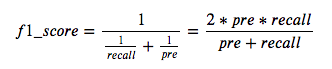
- 反应了模型的稳健性
- 它是精确率和召回率的调和平均数
- 是一个综合的评判标准
- API：f1_score

### AUC
- AUC是一个模型评价指标，只能用于二分类模型的评价。该评价指标通常应用的比较多！
    - 应用的比较多是原因是因为很多的机器学习的分类模型计算结果都是概率的形式（比如逻辑回归），那么对于概率而言，我们就需要去设定一个阈值来判定分类，那么这个阈值的设定就会对我们的正确率和准确率造成一定成都的影响。
        - 逻辑回归的默认阈值为0.5
- AUC(Area under Curve)，表面上意思是曲线下边的面积，这么这条曲线是什么？
    - ROC曲线（receiver operating characteristic curve，接收者操作特征曲线）
        - 真正例率TPR = TP / (TP + FN)
                - 预测为正例且实际为正例的样本占所有训练集中为正例样本的比例。
                - 将正例预测对的占正样本的比例（预测对的比例），这个比例越大越好
        - 伪反例率FPR = FP / (FP + TN)
                - 预测为正例但实际为负例的样本占训练集中所有负例样本的比例
                - 将负例预测错的占负样本的比例（预测错的比例），这个比例越小越好
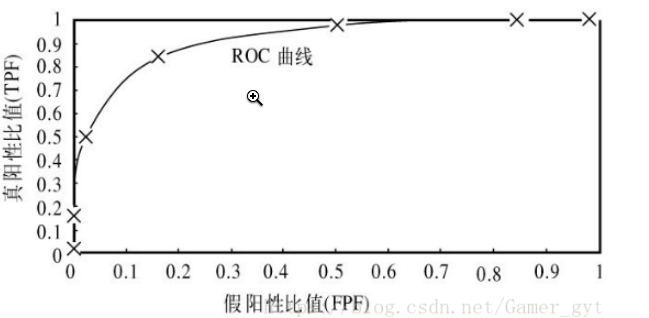


- 在理想情况下，最佳的分类器应该尽可能地处于左上角，这就意味着分类器在伪反例率（预测错的概率）很低的同时获得了很高的真正例率（预测对的概率）。也就是说ROC曲线围起来的面积越大越好，因为ROC曲线面积越大，则曲线上面的面积越小，则分类器越能停留在ROC曲线的左上角。
    - AUC的的取值是固定在0-1之间。AUC的值越大越好。

- AUC的API
    - from sklearn.metrics import roc_auc_score
    - y_pre = predict_proba(x_test)返回预测的概率
    - auc=roc_auc_score(y_test,y_pre[:,1])